In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the Alpaca api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [4]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [5]:
list_of_tickers = ["SPY", "AGG"]

timeframe = '1D'
start_date = pd.Timestamp('2019-01-01').isoformat()
end_date = pd.Timestamp('2019-12-31').isoformat()
df = api.get_barset(list_of_tickers,timeframe, limit=None, start=start_date, end=end_date, after=None, until=None,).df

df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head(5)

,AGG,SPY
,close,close
2019-12-03 00:00:00-05:00,113.02,309.47
2019-12-04 00:00:00-05:00,112.80,311.47
2019-12-05 00:00:00-05:00,112.69,312.05
2019-12-06 00:00:00-05:00,112.54,314.84
2019-12-09 00:00:00-05:00,112.58,313.87


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [6]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns = df.pct_change()
daily_returns.head(5)

,AGG,SPY
,close,close
2019-12-03 00:00:00-05:00,NaN,NaN
2019-12-04 00:00:00-05:00,-0.001947,0.006463
2019-12-05 00:00:00-05:00,-0.000975,0.001862
2019-12-06 00:00:00-05:00,-0.001331,0.008941
2019-12-09 00:00:00-05:00,0.000355,-0.003081


In [7]:
# Calculate volatility
# YOUR CODE HERE
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']

#volatility of AGG
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_agg.round(7)

0.0084863

In [8]:
#volatility of SPY
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']
std_dev_daily_return_spy.round(7)

0.0306714

In [9]:
# Save the last day's closing price
#last day's closing price of AGG 
last_price_AGG = df['AGG']['close'][-1]
print(f"The last day closing price of SPY is ${last_price_AGG}")

The last day closing price of SPY is $116.88


In [10]:
#last day's closing price of AGG 
last_price_SPY = df['SPY']['close'][-1]
print(f"The last day closing price of SPY is ${last_price_SPY}")

The last day closing price of SPY is $287.3926


In [11]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()


In [14]:
# Run the Monte Carlo Simulation
  # YOUR CODE HERE
for x in range(number_simulations):
    simulated_spy_prices = [last_price_SPY]
    simulated_agg_prices = [last_price_AGG]
    
    for i in range(number_records):
        
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
      
    
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
        
     
    monte_carlo["SPY prices"] = pd.Series(simulated_spy_prices)
    monte_carlo["AGG prices"] = pd.Series(simulated_agg_prices)
      
   
    simulated_daily_returns = monte_carlo.pct_change()
     
    
    weights = [0.6, 0.4]
    
      
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
 
portfolio_cumulative_returns.head()       

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008655,0.981525,0.972042,0.996693,1.019713,1.024245,1.033948,0.984041,1.004882,0.994521,...,1.006127,0.981213,1.025861,0.997893,0.988862,1.009833,0.983287,0.974425,1.009710,0.987467
2,1.025876,0.994311,0.967428,0.990547,1.030286,0.986490,1.009777,0.941438,0.999631,1.024723,...,1.012238,1.007058,1.035934,1.002237,0.992230,0.995134,0.979370,0.974072,1.007222,0.999882
3,1.020623,0.992409,0.978665,0.966363,1.025522,0.995996,1.022854,0.917277,0.996722,1.055008,...,1.010307,1.015356,1.052311,1.006032,0.964820,0.988375,0.991633,0.993113,1.018281,0.993420
4,1.052927,1.001538,0.963233,0.986313,1.029478,0.974841,1.016060,0.905254,1.025072,1.012332,...,1.015507,1.006418,1.044443,1.023786,0.986007,0.974860,0.967976,0.993867,1.033900,1.004841


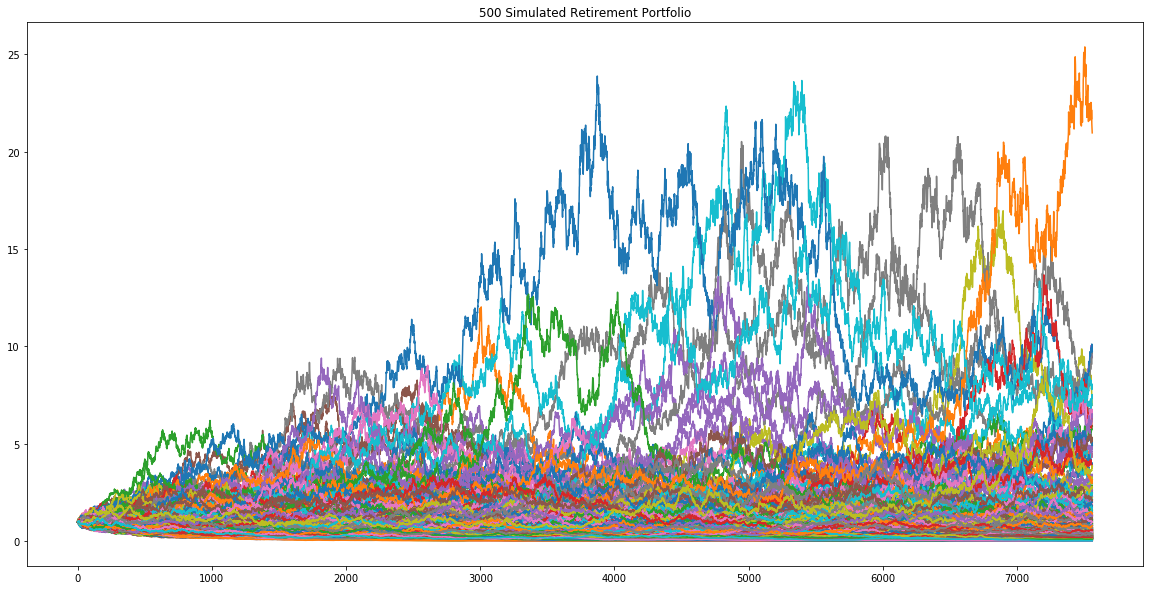

In [17]:
# Visualize the Simulation
# YOUR CODE HERE
title_1 = f"{x+1} Simulated Retirement Portfolio"
portfolio_cumulative_returns.plot(legend= None, title = title_1, figsize = (20, 10))

In [18]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
portfolio_cumulative_returns_30yrs = portfolio_cumulative_returns.iloc[-1, :]
portfolio_cumulative_returns_30yrs.head()

0    0.404483
1    0.187915
2    0.666372
3    0.795622
4    0.548049
Name: 7560, dtype: float64

In [20]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
portfolio_cumulative_returns_20yrs = portfolio_cumulative_returns.iloc[5040, :]
portfolio_cumulative_returns_20yrs.head()

0    0.238927
1    0.350107
2    0.134589
3    0.512191
4    0.804643
Name: 5040, dtype: float64

In [31]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval_30yrs = portfolio_cumulative_returns_30yrs.quantile(q=[.05, 0.95])
confidence_interval_30yrs

0.05    0.013421
0.95    3.059825
Name: 7560, dtype: float64

In [32]:
confidence_interval_20yrs = portfolio_cumulative_returns_20yrs.quantile(q=[.05, 0.95])
confidence_interval_30yrs

0.05    0.013421
0.95    3.059825
Name: 7560, dtype: float64

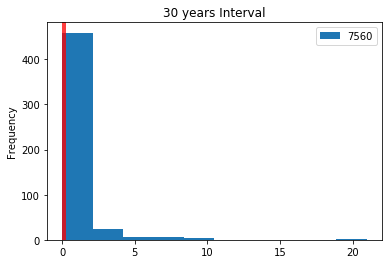

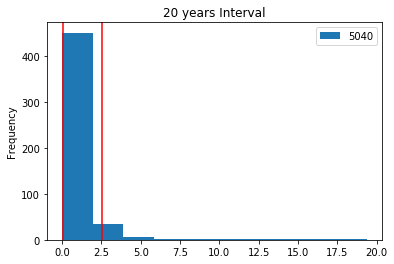

In [92]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE

plt.figure();
portfolio_cumulative_returns_30yrs.plot(kind = 'hist', bins = 10, title = "30 years Interval", legend = True)
plt.axvline(confidence_interval_30yrs.iloc[0], color = 'r')
plt.axvline(confidence_interval_30yrs.iloc[1], color = 'r')

plt.figure();
portfolio_cumulative_returns_20yrs.plot(kind = 'hist', bins = 10, title = "20 years Interval", legend = True)
plt.axvline(confidence_interval_20yrs.iloc[0], color = 'r')
plt.axvline(confidence_interval_20yrs.iloc[1], color = 'r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [40]:
# YOUR CODE HERE
initial_investment = 20000
confidence_interval_30yrs = portfolio_cumulative_returns_30yrs.quantile(q=[0.1, 0.5, 0.9])
tenth = int(confidence_interval_30yrs.iloc[0] * initial_investment)
fifty = int(confidence_interval_30yrs.iloc[1] * initial_investment)
nintey = int(confidence_interval_30yrs.iloc[2] * initial_investment)
print(f"The expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles are ${tenth}, ${fifty}, and ${nintey}, respectively.")

The expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles are $635, $4283, and $31457, respectively.


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [54]:
# YOUR CODE HERE

expected_return_at_10th = (initial_investment * confidence_interval_30yrs.iloc[0]).round(2)
expected_return_at_50th = (initial_investment * confidence_interval_30yrs.iloc[1]).round(2)
expected_return_at_90th = (initial_investment * confidence_interval_30yrs.iloc[2]).round(2)

print(f"The expected portfolio return of $20,000 over the next 30 years will end within the range of"
      f" 10th percentil would be ${expected_return_at_10th}, 50th percentil would be ${expected_return_at_50th} and"
      f" 90th percentile would be ${expected_return_at_90th}.")

The expected portfolio return of $20,000 over the next 30 years will end within the range of 10th percentil would be $635.09, 50th percentil would be $4283.41 and 90th percentile would be $31457.74.


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [53]:
# YOUR CODE HERE
projected_yearly_income_plaid = 6000
withdrawal_rate = 0.04
withdrawal_amount = (expected_return_at_90th * withdrawal_rate).round(2)
                                                                      
if withdrawal_amount > projected_yearly_income_plaid:
    print(f" Yes, the 4% withdrawal from the 10th percentile is ${withdrawal_amount} and" 
          f" is above the plaid analysis projected anual income ${projected_yearly_income_plaid}.")
else:
    print(f"No, the 4% withdrawal fromt he 10th percentile is ${withdrawal_amount} and is at or below plaid"
          f"analysis projected annual income of ${projected_yearly_income_plaid}.")
    

No, the 4% withdrawal fromt he 10th percentile is $1258.31 and is at or below plaidanalysis projected annual income of $6000.


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [89]:
initial_investment = 20000

new_investment = initial_investment * (1.5)   # 1.5 = increase in investment 50% 

new_expected_return = new_investment * confidence_interval_30yrs.iloc[2]

new_withdrawal_amount=(new_expected_return * withdrawal_rate).round(2)

if new_withdrawal_amount > projected_yearly_income_plaid:
   
   print(f" Yes, the 4% withdrawal form the 10th percentile is ${new_withdrawal_amount} and is above the plaid analysis"
       f" projected annaul income of ${projected_yearly_income_plaid}.")
    
else:
    print(f" Yes, the 4% withdrawal form the 10th percentile is ${new_withdrawal_amount} and is at or below" 
          f" the plaid analysis projected annaul income of ${projected_yearly_income_plaid}.")


 Yes, the 4% withdrawal form the 10th percentile is $1887.46 and is at or below the plaid analysis projected annaul income of $6000.


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE